# LUO Zheng 21-738-901

# Network Science H21: Assignment 3: Centrality Measures

In [1]:
import os
import numpy as np
import networkx as nx
import scipy.stats as sp
import matplotlib.pyplot as plt
import math
import copy

## Definition of functions

In [2]:
# define a function to calculate degree & closeness & betweenness & eigenvector centrality
def cal_centrality(graph):
    # calculate the degree centrality
    d_c = [j for i, j in nx.degree_centrality(graph).items()]
    # calculate the closeness centrality
    c_c = [j for i, j in nx.closeness_centrality(graph).items()]
    # calculate the betweenness centrality
    b_c = [j for i, j in nx.betweenness_centrality(graph).items()]
    # calculate the eigenvector centrality
    e_c = [j for i, j in nx.eigenvector_centrality(graph).items()]
    # return a tuple w/ degree & closeness & betweenness & eigenvector centrality
    return [d_c, c_c, b_c, e_c] 

In [3]:
# define a function to calculate Pearson’s, Spearman’s 
# and Kendall’s correlation coefficients
def cal_corr(a1, a2):
    # Pearson's
    p = sp.pearsonr(a1, a2)[0]
    # Spearman's
    s = sp.spearmanr(a1, a2)[0]
    # Kendall's
    k = sp.kendalltau(a1, a2)[0]
    # return a tuple w/ P, S, K's correlation coefficient
    return [p, s, k]

In [4]:
# define a function to plot pairwise comparisons in a scatter plot
def scatter(x, y, xl, yl, name, p, s, k, axis):
    axis.scatter(x, y)
    axis.set_xlabel(xl)
    axis.set_ylabel(yl)
    axis.set_title(f'{name}, p:{p:.2f}, s:{s:.2f}, k:{k:.2f}')

In [5]:
# define randomization function (From assignment 2)
def randomize(graph):
    graph_rand = copy.deepcopy(graph) # as nx.alo.swap/rand_ref shuffles in place
                            # perform deep copy to preserve the original graph
    n_links = graph.number_of_edges() # count the number of links
    graph_rand = nx.algorithms.smallworld.random_reference(graph_rand,niter = 10, connectivity=False)
                                                                        # An edge is rewired approximately 'niter' times.
    return graph_rand

## A03.1 Centrality correlations
### Task: Learn about centrality measures and how they correlate in different networks.
For the given networks compute:
+ the degree $k_i$, closeness $c_i$, betweenness $b_i$ and eigenvector
$e_i$ centrality for each node;
+ then do a scatter plot for each pair of centralities (6 plots
total);
+ compute Pearson’s, Spearman’s and Kendall’s correlation 
coefficients for each pair and note them on the scatter
plots;
+ briefly explain, for the Jazz collaborations data, what each
of the centrality measures means in practice.

In each plot, p, s, k stands for Pearson's, Spearman's and Kendal's correlation coefficient respectively.


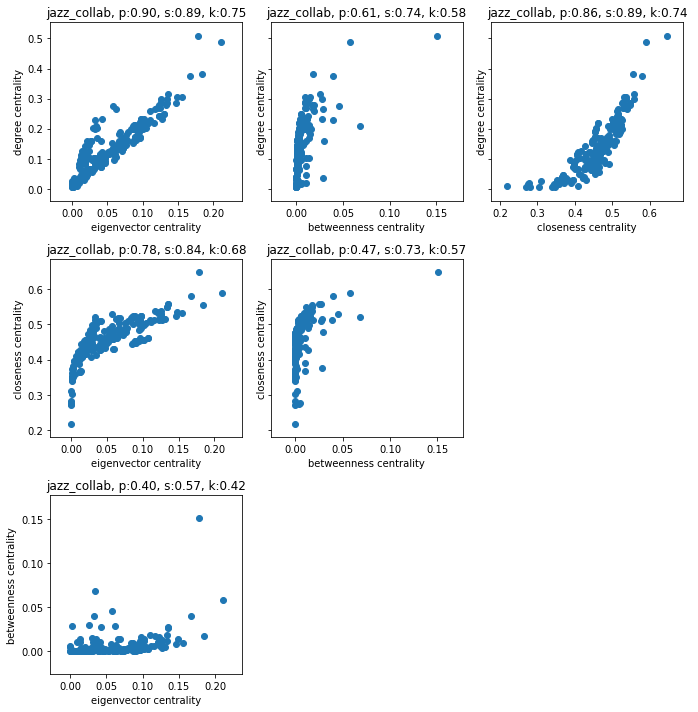

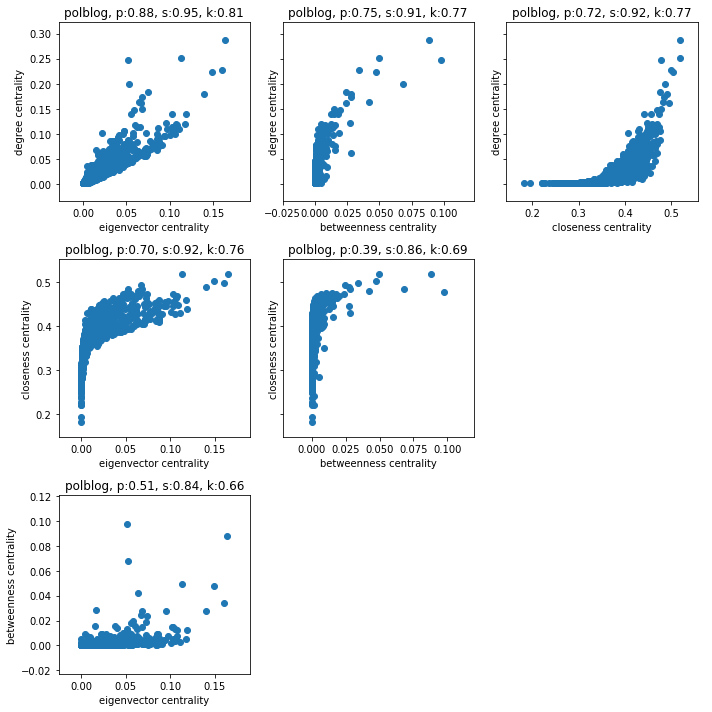

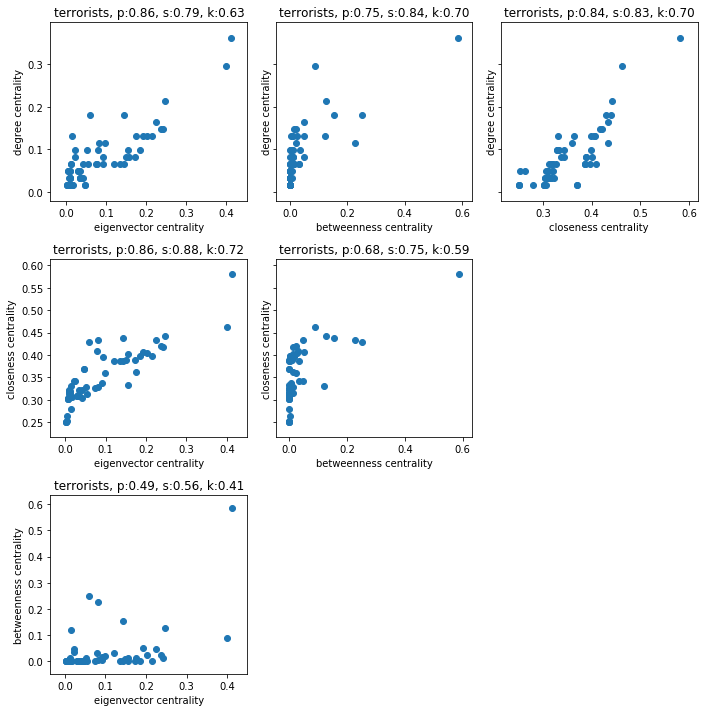

In [6]:
# load the working directory and data folder
cwd = os.getcwd()
g_folder = f'{cwd}/Data/'

g_names = ['jazz_collab', 'polblog', 'terrorists'] # 3 networks to consider in 1 & 2
c_names = ['degree centrality', 'closeness centrality', 'betweenness centrality', 'eigenvector centrality']

print('In each plot, p, s, k stands for Pearson\'s, Spearman\'s and Kendal\'s correlation coefficient respectively.')

for g_n in g_names:
    g = nx.read_gml(f'{g_folder}graph_{g_n}.gml') # load the original network
    c_list = cal_centrality(g)
    
    # start of the analysis
    fig, axs = plt.subplots(3, 3, figsize=(10,10), sharey='row')
    for i in range(3):
        col_n = 0
        for j in range(4):
            l = 3 - j
            if i >= l:
                continue
            else:
                p, s, k = cal_corr(c_list[l], c_list[i])
                scatter(c_list[l], c_list[i], c_names[l], c_names[i], g_n, p, s, k, axs[i, col_n])
                col_n = col_n + 1
        if col_n < 3:
            for col in range(col_n, 3):
                axs[i, col].axis('off')
        fig.tight_layout()

### Brief analysis of the meaning of each centrality measure in practice w.r.t. Jazz collaborations data
As the Jazz collaboration network is an undirected unweighted network with each node representing a jazz musician and each edge representing that two musicians have played together in a band.
- **Degree centrality** measures the popolarity of a jazz musician in term of the number of musicians he / she has cooperated with. In the above scatter plots, the normalized degree centrality is presented to measure out of all N-1 musicians in the network, what percentage of it the musician has performed with.
- **Closeness centrality** measures a jazz musician's professional interpersonal relationship, meaning if he / she wants to contact another musician, how soon he / she can get in tough with the musician.
- **Betweenness centrality** measures a jazz musician's ability to intermediate among other musicians, or more precisely if two other musicians fancy a collaboration, how capable he / she is to bring them together.
- **Eigenvector centrality** measures how likable a given musician is. From a 'random collaborator' point of view, it is how likely other musicians may come back to seek more collaborations with the given musician after having collaborated.
- Thus it is no wonder that the degree centrality and the eigenvector centrality appear to be most significantly correlated, for both measures the popularity in general, but with different approaches.

## A03.2 Centrality and randomisation
### Task: Explore the effect of rewiring randomisation on centrality metrics.
+ For each dataset $G$, randomise it to obtain a network $G_{rnd}$ (same procedure as previous assignments).
+ Do a scatter plot of each centrality before vs. after randomisation (e.g. $k^{rnd}_i$ vs $k_i$ ) and compute the corresponding correlation coefficient.
+ Why do you get that result for degree centrality?

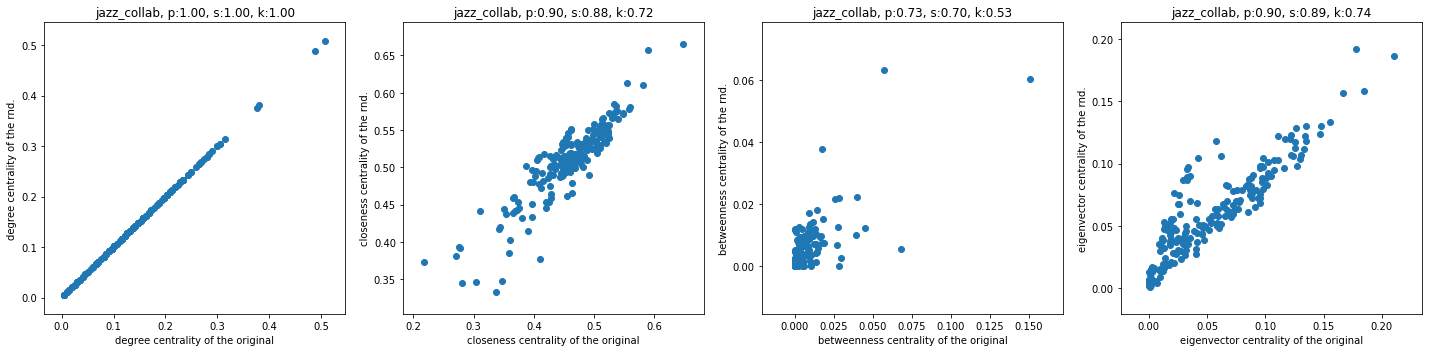

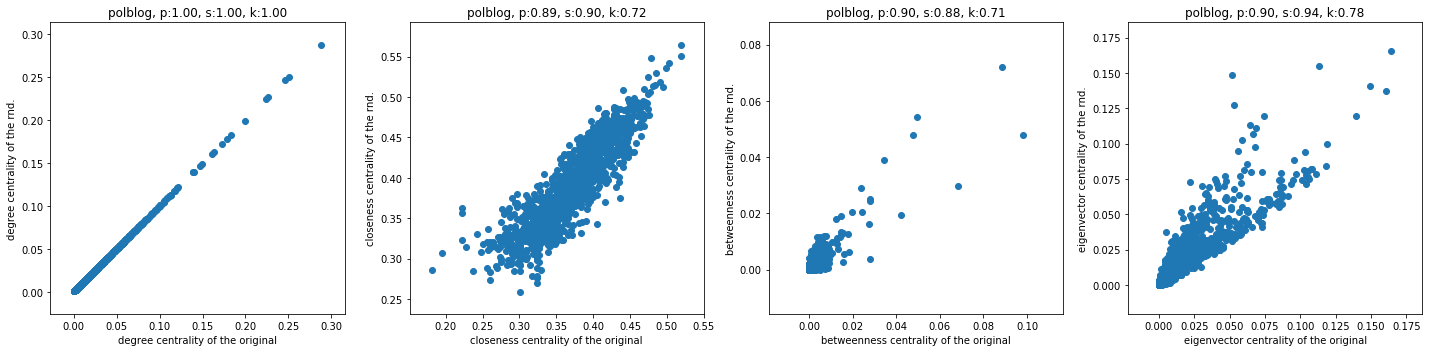

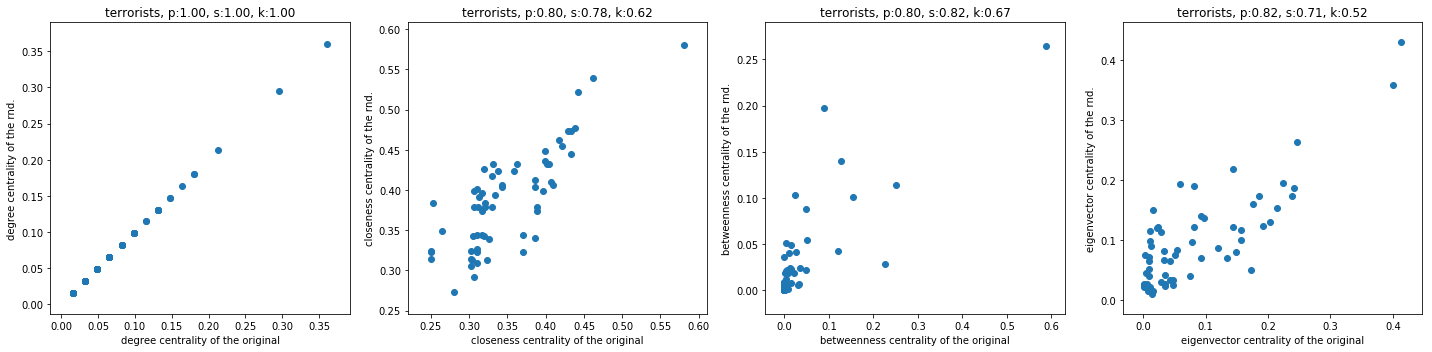

In [7]:
# load the file names of the original networks
cwd = os.getcwd()
g_folder = f'{cwd}/Data/'
g_rand_folder = f'{cwd}/Data Random/' # load randomized sets -> randomize instead later

g_names = ['jazz_collab', 'polblog', 'terrorists'] # 3 networks to consider in 1 & 2
c_names = ['degree centrality', 'closeness centrality', 'betweenness centrality', 'eigenvector centrality']

for g_n in g_names:
    g = nx.read_gml(f'{g_folder}graph_{g_n}.gml') # load the original network
    g_rand = randomize(g) # randomize the original network
    
    c_list = cal_centrality(g)
    c_rand_list = cal_centrality(g_rand)
    
    fig, axs = plt.subplots(1, 4, figsize = (20, 5))
    
    for i in range(4):
        p, s, k = cal_corr(c_list[i], c_rand_list[i])
        scatter(c_list[i], c_rand_list[i], f'{c_names[i]} of the original', f'{c_names[i]} of the rnd.', g_n, p, s, k, axs[i])
    fig.tight_layout()


### Analysis of the reason behind getting that result for degree centrality?
Because the randomization is a degree-preserving process, which doesn't change the first-order property of a network. As degree centrality is a local property that depends solely on the degree of a node, the scatter plot of degree centrality shows a perfect linear relationship between that of the original network and the randomized network.

## A03.3 Page Rank
### Task: Rank the nodes’ importance by means of the PageRank algortihm.
In the dataset “Florida_foodweb.graphml” each node is a species, and a directed link exists between 𝑖 and 𝑗 if 𝑖 feeds from 𝑗

+ Use different values of 𝛼, e.g.
𝛼 = 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.99
+ Compute Spearman’s rank correlation 𝜌 between the PageRanks for 𝛼0 = 0.85 and all other 𝛼s, then plot them as a scatter plot with 𝛼 on the x-axis and 𝜌(𝛼) on the y-axis.

Text(0.5, 1.0, "Spearman's correlation between PageRank w/ alpha = 0.85 and PageRank w/ other alpha values")

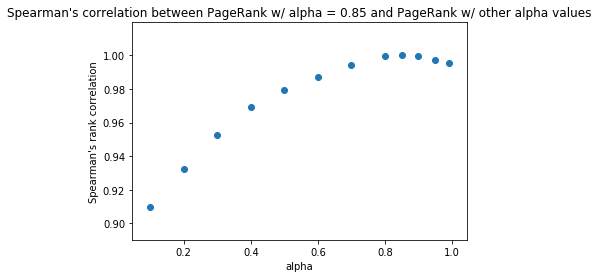

In [8]:
# load the file names of the original networks
cwd = os.getcwd()
g_folder = f'{cwd}/Data/'
g_n = 'Florida_foodweb'
g = nx.read_graphml(f'{g_folder}{g_n}.graphml')

# generate a list of alpha
alpha_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.99]
pr85 = [j for i,j in nx.pagerank(g, alpha=0.85).items()]
spearman_list = [cal_corr([j for i,j in nx.pagerank(g, alpha=ap).items()], pr85)[1] for ap in alpha_list]
plt.scatter(alpha_list, spearman_list)
plt.xlabel('alpha')
plt.ylabel('Spearman\'s rank correlation')
plt.title('Spearman\'s correlation between PageRank w/ alpha = 0.85 and PageRank w/ other alpha values')